# Machine Learning 101++ in Python

by Pieter Buteneers (@pieterbuteneers) and Bart De Vylder from CoScale


## 1. Imports

Let's first start with importing all the necessary packages. Some imports will be repeated in the exercises but if you want to skip some parts you can just execute the imports below and start with any exercise.

As you can see we also import packages from `__future__`. This is to improve the compatibility with Python 3, but will not guarantee it.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (13.0, 8.0)
%matplotlib inline

import pickle

import sklearn
import sklearn.linear_model
import sklearn.preprocessing
import sklearn.gaussian_process
import sklearn.ensemble

## 2. Linear Regression

Linear Regression assumes a linear realationship between 2 variables. 

As an example we'll consider the historical page views of a web server and compare it to its CPU usage. We'll try to predict the CPU usage of the server based on the page views of the different pages. 

### 2.1 Data import and inspection

Let's import the data and take a look at it.

In [2]:
import pickle

cpu_usage, page_views, page_names, total_page_views = pickle.load(open('data/cpu_page_views.pickle', 'rb'), encoding='latin1')

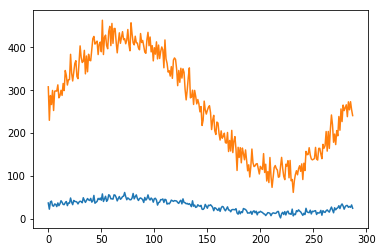

In [3]:
plt.plot(cpu_usage)
plt.plot(total_page_views)
plt.show()

The orange line on the plot above is the number of page views and the blue line is the CPU load that viewing this pages generates on the server.

### 2.2 Simple linear regression

First, we're going to work with the total page views on the server, and compare it to the CPU usage. We can make use of a [PyPlot's scatter plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) to understand the relation between the total page views and the CPU usage:

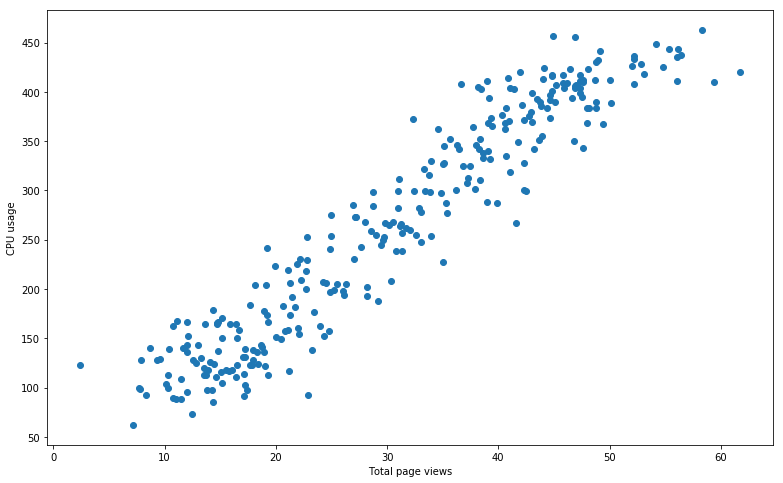

In [4]:
plt.figure(figsize=(13,8))
plt.xlabel("Total page views")
plt.ylabel("CPU usage")
##### Implement this part of the code #####
#raise NotImplementedError()
plt.scatter(cpu_usage ,total_page_views)

There clearly is a strong correlation between the page views and the CPU usage. Because of this correlation we can build a model to predict the CPU usage from the total page views. If we use a linear model we get a formula like the following:

$$ \text{cpu_usage} = c_0 + c_1 \text{total_page_views} $$

Since we don't know the exact values for $c_0$ and $c_1$ we will have to compute them. For that we'll make use of the [scikit-learn](http://scikit-learn.org/stable/) machine learning library for Python and use [least-squares linear regression](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

In [5]:
import sklearn.linear_model
simple_lin_model = sklearn.linear_model.LinearRegression()

Now we need to feed the data to the model to fit it. The [model.fit(X,y) method](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) in general takes a matrix X and vector y as arguments:
```
      X = [[x_11, x_12, x_13, ...],                  y = [y_1,
           [x_21, x_22, x_23, ...],                       y_2,  
           [x_31, x_32, x_33, ...],                       y_3,
           ...]                                           ...]

```

and tries to find coefficients that allow to predict the `y_i`'s from the `x_ij`'s. In our case the matrix X will consist of only 1 column containing the total page views. Our `total_page_views` variable however, is still only a one-dimensional vector, so we need to [`np.reshape()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) it into a two-dimensional array. Since there is only 1 feature the second dimension should be 1.

Then we fit our model using the the total page views and cpu. The coefficients found are automatically stored in the ```simple_lin_model``` object.

In [8]:
##### Implement this part of the code #####
#raise NotImplementedError()

total_page_views_2d = total_page_views.reshape((-1,1))
#print(total_page_views_2d)
#print(cpu_usage)

simple_lin_model.fit(total_page_views_2d, cpu_usage) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We can now inspect the coefficient $c_1$ and constant term (intercept) $c_0$ of the model:

In [9]:
print("Coefficient = %s, constant term = %f" % (str(simple_lin_model.coef_), simple_lin_model.intercept_))

Coefficient = [0.11271075], constant term = 0.724283


So this means that each additional page view adds about 0.11% CPU load to the server and all the other processes running on the server consume on average 0.72% CPU.

Once the model is trained we can use it to [```predict```](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) the outcome for a given input (or array of inputs). Note that the predict function requires a 2-dimensional array similar to the ```fit``` function.

What is the expected CPU usage when we have 880 page views per second?

In [10]:
##### Implement this part of the code #####
#raise NotImplementedError()
simple_lin_model.predict( [[ 880 ]] )

array([99.90974613])

Now we plot the linear model together with our data to verify it captures the relationship correctly (the predict method can accept the entire ```total_page_views``` array at once).

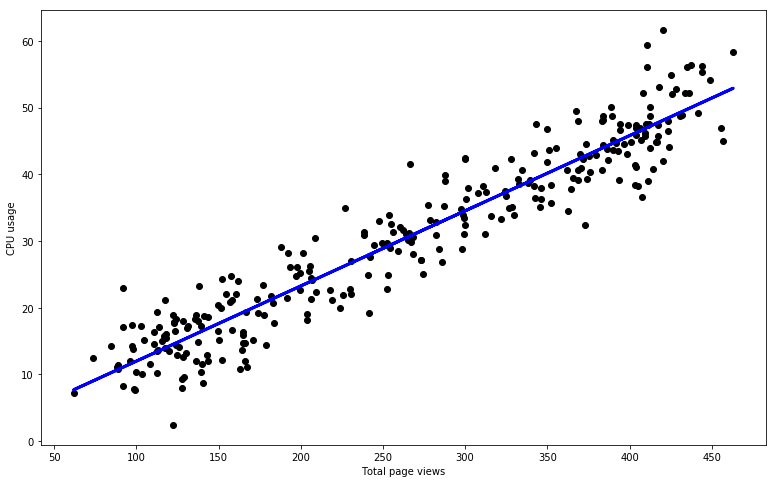

In [11]:
plt.figure(figsize=(13,8))

plt.scatter(total_page_views, cpu_usage,  color='black')
plt.plot(total_page_views, simple_lin_model.predict(total_page_views.reshape((-1, 1))), color='blue', linewidth=3)

plt.xlabel("Total page views")
plt.ylabel("CPU usage")

plt.show()

Our model can calculate the R2 [`score`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) indicating how well the linear model captures the data. A score of 1 means there is perfect linear correlation and the model can fit the data perfectly, a score of 0 (or lower) means that there is no correlation at all (and it does not make sense to try to model it that way). The score method takes the same arguments as the fit method.

In [12]:
simple_lin_model.score(total_page_views.reshape((-1, 1)), cpu_usage)

0.9047919298024893

### 2.3 Extrapolation

Now let's repeat this experiment with different but similar data. We will try to predict what the CPU usage will be if there will be 8 page views (per second).

In [13]:
cpu_usage, total_page_views = pickle.load(open('data/cpu_page_views_2.pickle', 'rb'), encoding='latin1')

In [16]:
simple_lin_model = sklearn.linear_model.LinearRegression()
simple_lin_model.fit(total_page_views, cpu_usage)
##### Implement this part of the code #####
#raise NotImplementedError()
prediction = simple_lin_model.predict([[8]])

print('The predicted value is:', prediction)

assert prediction < 25

The predicted value is: [24.95291849]


Now let's plot what you have done.

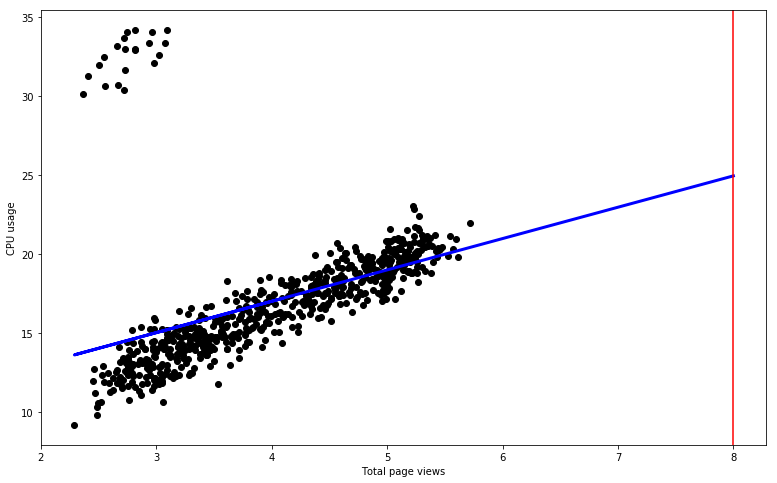

In [17]:
all_page_views = np.concatenate((total_page_views, [[8]]))

plt.figure(figsize=(13,8))

plt.scatter(total_page_views, cpu_usage,  color='black')
plt.plot(all_page_views, simple_lin_model.predict(all_page_views), color='blue', linewidth=3)
plt.axvline(8, color='r')

plt.xlabel("Total page views")
plt.ylabel("CPU usage")

plt.show()

Is this what you would expect? Can you see what's wrong?

Let's plot the time series again to get a different view at the data.

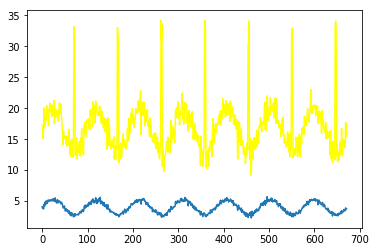

In [21]:
plt.plot(cpu_usage, color='yellow')
plt.plot(total_page_views)
plt.show()

The spikes of CPU usage are actually backups that run at night and they can be ignored. So repeat the exersize again but ignore these data points.

Hint: The selection variable should contain `True` where there is no backup going on and `False` when the backup occurs. This is an easy shortcut to do a selection of specific data points in numpy arrays.

672
The predicted value is: [28.32465367]


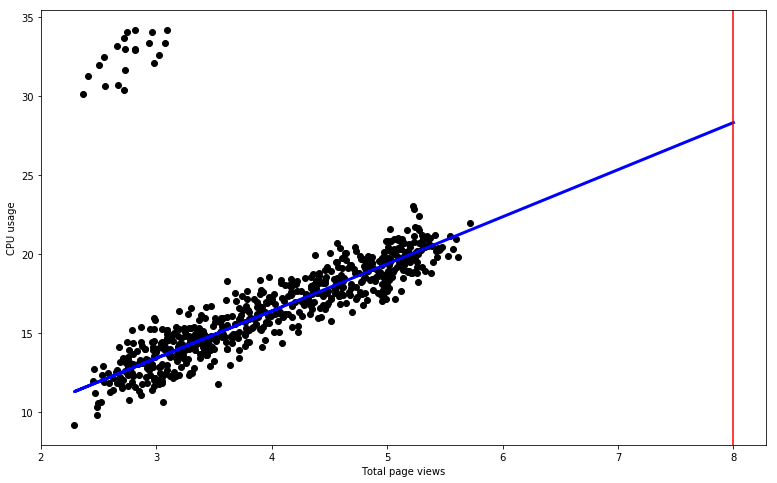

In [27]:
##### Implement this part of the code #####
#raise NotImplementedError()
print(len(cpu_usage))
selection = cpu_usage < 25

assert selection.dtype == np.dtype('bool')
assert len(selection) == len(total_page_views)

simple_lin_model = sklearn.linear_model.LinearRegression()
simple_lin_model.fit(total_page_views[selection], cpu_usage[selection])
prediction = simple_lin_model.predict([[8]])

print('The predicted value is:', prediction)

all_page_views = np.concatenate((total_page_views, [[8]]))

plt.figure(figsize=(13,8))

plt.scatter(total_page_views, cpu_usage,  color='black')
plt.plot(all_page_views, simple_lin_model.predict(all_page_views), color='blue', linewidth=3)
plt.axvline(8, color='r')

plt.xlabel("Total page views")
plt.ylabel("CPU usage")

plt.show()

assert prediction > 23

So what you should have learned from the previous exercise is that you should always look at your data and/or write scripts to inspect your data. Additinally extrapolation does not always work because there are no training examples in that area.

## 3. Multiple linear regression

A server can host different pages and each of the page views will generate load on the CPU. This load will however not be the same for each page.

Now let us consider the separate page views and build a linear model for that. The model we try to fit takes the form:

$$\text{cpu_usage} = c_0 + c_1 \text{page_views}_1 + c_2 \text{page_views}_2 + \ldots + c_n \text{page_views}_n$$

where the $\text{page_views}_i$'s correspond the our different pages:


In [28]:
# load the data
cpu_usage, page_views, page_names, total_page_views = pickle.load(open('data/cpu_page_views.pickle', 'rb'), encoding='latin1')

print(page_names)

['products/science.html' 'products/non-fiction.html'
 'products/fiction.html' 'api/comment' 'api/product/get.php'
 'resources/js/basket.js']


We start again by creating a [```LinearRegression```](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) model.

In [29]:
multi_lin_model = sklearn.linear_model.LinearRegression()

Next we fit the model on the data, using `multi_lin_model.fit(X,y)`. In contrast to the case above our `page_views` variable already has the correct shape to pass as the X matrix: it has one column per page.

In [33]:
##### Implement this part of the code #####
#raise NotImplementedError()
multi_lin_model.fit( page_views , cpu_usage )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now, given the coefficients calculated by the model, which capture the contribution of each page view to the total CPU usage, we can start to answer some interesting questions. For example, 
which page view causes most CPU usage, on a per visit basis? 

For this we can generate a table of page names with their coefficients in descending order:

In [34]:
# Some quick and dirty print code to print the most consuming pages first

print('Index \t CPU (\%) \t\t Page')
print('----------------------------------------------------------')

indices = np.argsort(multi_lin_model.coef_)
for i in indices[::-1]:
    print(i, '\t', multi_lin_model.coef_[i], '\t', page_names[i])

Index 	 CPU (\%) 		 Page
----------------------------------------------------------
5 	 0.30388352698063414 	 resources/js/basket.js
4 	 0.18542589967127457 	 api/product/get.php
3 	 0.13470945150885036 	 api/comment
1 	 0.13292337279367783 	 products/non-fiction.html
2 	 0.08866496454345574 	 products/fiction.html
0 	 0.040800903588510955 	 products/science.html


From this table we see that 'resources/js/basket.js' consumes the most per CPU per view. It generates about 0.30% CPU load for each additional page view. 'products/science.html' on the other hand is much leaner and only consumes about 0.04% CPU per view.

Now let us investigate the constant term again.

In [35]:
print('The other processes on the server consume %.2f%%' % multi_lin_model.intercept_)

The other processes on the server consume 0.64%


As you can see this term is very similar to the result achieved in single linear regression, but it is not entirely the same. This means that these models are not perfect. However, they seem to be able to give a reliable estimate.

## 4. Non-linear Regression

Sometimes linear relations don't cut it anymore, so you might want a more complex method. There are 2 approaches to this:
* Use a non-linear method (such as Neural Networks, Support Vector Machines, Random Forests and Gaussian Processes)
* Use non-linear features as pre-processing for a linear method

Actually both methods are in essence identical and there is not always a clear distinction between the two. We will use the second approach in this section since it is easier to understand what is going on.

Please note that it is very often not even necessary to use non-linear methods, since the linear methods can be extremely powerful on their own and they are quite often very stable and reliable (in contrast to non-linear methods).

### 4.1. Fitting a sine function with linear regression

Als an example task we will try to fit a sine function. We will use the [`np.sine()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html) function to compute the sine of the elements in a numpy array.

Let's first try this with linear regression.

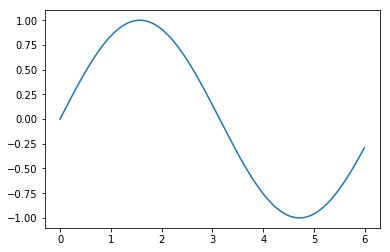

In [41]:
x = np.arange(0,6, 0.01).reshape((-1, 1))
#print(np.arange(0,6, 0.01))
plt.plot(x, np.sin(x))
plt.show()

For training we will draw 10 samples of this function as our train set.

In [42]:
# helper function to generate the data
def sine_train_data(): 
    x_train = np.linspace(0, 6, 10).reshape((-1, 1))
    y_train = np.sin(x_train)
    return x_train, y_train

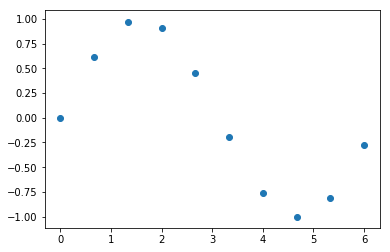

In [43]:
x_train, y_train = sine_train_data()
plt.scatter(x_train, y_train)
plt.show()

Now let's try to fit this function with linear regression.

The R2 score of this model is: 0.5058738615695003


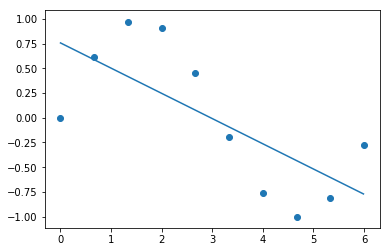

In [44]:
x_train, y_train = sine_train_data()

##### Implement this part of the code #####
#raise NotImplementedError()
model = sklearn.linear_model.LinearRegression()
model.fit( x_train, y_train )

print('The R2 score of this model is:', model.score(x_train, y_train))

plt.scatter(x_train, y_train)
plt.plot(x, model.predict(x))
plt.show()


As you can see this fit is not optimal.

### 4.2. Fitting a sine function using polynomial expansion

One of the easiest ways to make your machine learning technique more *intelligent* is to extract relevant features from the data. These features can be anything that you can find that will make it easier for the metod to be able to fit the data. This means that as a machine learning engineer it is best to know and understand your data.

As some of you might remember from math class is that you can create an approximation of any function (including a sine function) using a polynomial function with the [Taylor expansion](https://en.wikipedia.org/wiki/Taylor_series). So we will use that approach to learn a better fit.

In this case we will create what we call features using a [polynomial expansion](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). If you set the degree to 3 it will generate data of the 0d, 1st, 2nd and 3rd order (including cross products) as shown in the example below (change x and degree to see the different expansions of x to a certain degree).

In [45]:
import sklearn.preprocessing

x = 2
pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=3)
pol_exp.fit_transform(x)

array([[1., 2., 4., 8.]])

As you can see above this function transforms $x$ into [$x^0$, $x^1$, $x^2$, $x^3$] with $x^0=1$ and $x^1 = x$. If you have 2 inputs it will also take the cross products so that [$x_1$, $x_2$] is transformed into: [1, $x_1$, $x_2$, $x_1^2$, $x_1x_2$, $x_2^2$, $x_1^3$, $x_1^2x_2$, $x_1x_2^2$, $x_2^3$] as shown below.

In [46]:
x = [[2, 3]]
pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=3)
pol_exp.fit_transform(x)

array([[ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In this example we only have 1 input so the number of features is always the `degree + 1`.

Because of this polynomial features extraction finding of the coefficients of the polynomial becomes a linear problem, so similar to the previous exercise on multiple linear regression you can find the optimal weights as follows:

$$y = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + \cdots + c_n x^n$$

So for multiple values of $x$ and $y$ you can minimize the error of this equation using linear regression. How this is done in practice is shown below.

The R2 score of this model is: 0.988917680887073


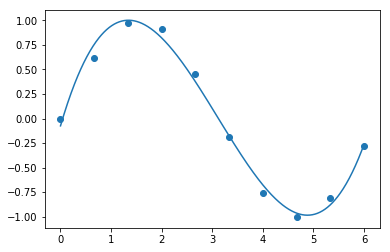

In [51]:
x_train, y_train = sine_train_data()

pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=3)

model = sklearn.linear_model.LinearRegression()
model.fit(pol_exp.fit_transform(x_train), y_train)
print('The R2 score of this model is:', model.score(pol_exp.fit_transform(x_train), y_train))

plt.scatter(x_train, y_train)
x = np.arange(0,6, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

The more relevant these features are the better your model can fit the data.

Now play with the degree of the polynomal expansion function below to create better features. Search for the optimal degree.

The R2 score of this model is: 0.9999999919544927


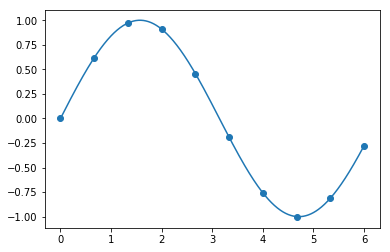

In [64]:
x_train, y_train = sine_train_data()

##### Implement this part of the code #####
#raise NotImplementedError()
pol_exp = sklearn.preprocessing.PolynomialFeatures(degree= 7 )

model = sklearn.linear_model.LinearRegression()
model.fit(pol_exp.fit_transform(x_train), y_train)

train_score = model.score(pol_exp.fit_transform(x_train), y_train)
print('The R2 score of this model is:', train_score)

plt.scatter(x_train, y_train)
x = np.arange(0,6, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

Now let's test this on new and unseen data.

In [65]:
def sine_test_data():
    x_test = 0.5 + np.arange(6).reshape((-1, 1))
    y_test = np.sin(x_test)
    return x_test, y_test

0.9999999919544927


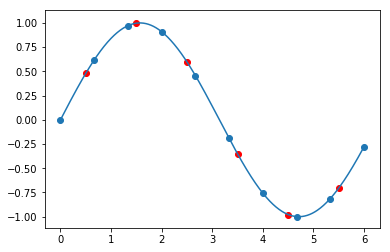

The R2 score of the model on the test set is: 0.9999999402319016


In [71]:
print(train_score)
assert train_score > .99999

x_test, y_test = sine_test_data()

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='r')
x = np.arange(0, 6, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

##### Implement this part of the code #####
#raise NotImplementedError()
test_score = model.score( pol_exp.fit_transform(x_test), y_test )

print('The R2 score of the model on the test set is:', test_score)

assert test_score > 0.99

If everything is correct your score is very close to 1. Which means that we have built a model that can fit this data (almost) perfectly.

### 4.3. Add noise to the equation

Sadly all the data that we measure or gather doesn'thave the mathematical precision of the data we used here. Quite often our measurements contain noise.

So let us repeat this process for data with more noise. Similarly as above, you have to choose the optimal degree of the polynomials.

In [72]:
# a helper function to create the sine train set that can also add noise to the data
def sine_train_data(noise=None):
    x_train = np.linspace(0, 6, 10).reshape((-1, 1))
    y_train = np.sin(x_train)
    
    # a fixed set of noise so you always get the same result
    if noise == 'fixed':
        x_train += np.array([0.13175057, 0.32022099, 0.1292511, 0.40002648, 0.13826272, -0.33049664, 
                             0.02334596, -0.32071842, 0.20949734, -0.11818228]).reshape((-1, 1))
    # random noise
    elif noise == 'random' or noise == True:
        x_train += np.random.randn(len(x_train)).reshape((-1, 1)) / 5
    
    return x_train, y_train

In [73]:
x_train, y_train = sine_train_data(noise='fixed')

##### Implement this part of the code #####
#raise NotImplementedError()
pol_exp = sklearn.preprocessing.PolynomialFeatures(degree= 8 )

model = sklearn.linear_model.LinearRegression()
model.fit(pol_exp.fit_transform(x_train), y_train)
print('The R2 score of this method on the train set is', model.score(pol_exp.fit_transform(x_train), y_train))

The R2 score of this method on the train set is 0.9878942623674243


Now let's see what this results to in the test set.

In [74]:
x_test, y_test = sine_test_data()
print('The R2 score of the model on the test set is:', model.score(pol_exp.fit_transform(x_test), y_test))

The R2 score of the model on the test set is: 0.7779060406805481


As you can clearly see, this result is not that good. Why do you think this is?

Now plot the result to see the function you created.

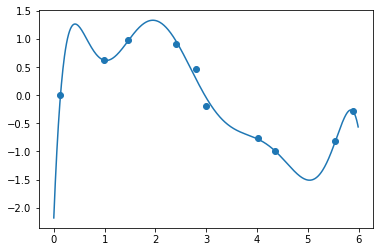

In [75]:
plt.scatter(x_train, y_train)
x = np.arange(0,6, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

Is this what you expect?

Now repeat the process below a couple of times for random noise.

The R2 score of this method on the train set is 0.9999999999999997


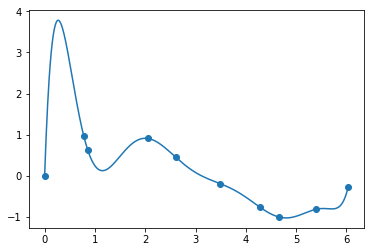

In [78]:
x_train, y_train = sine_train_data(noise='random')

pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=9)

model = sklearn.linear_model.LinearRegression()
model.fit(pol_exp.fit_transform(x_train), y_train)
print('The R2 score of this method on the train set is', model.score(pol_exp.fit_transform(x_train), y_train))

plt.scatter(x_train, y_train)
x = np.arange(x_train[0], x_train[-1], 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

What did you observe? And what is the method learning? And how can you avoid this?

Try to figure out a solution for this problem without changing the noise level.

The score of this method is on the train set is: 0.9331060929929709


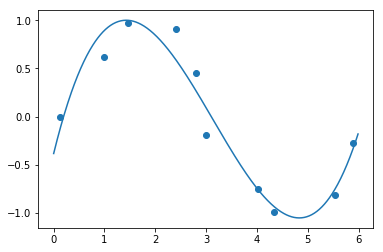

The score of the model on the test set is: 0.9955340459812839


In [83]:
x_train, y_train = sine_train_data(noise='fixed')
x_test, y_test = sine_test_data()

##### Implement this part of the code #####
#raise NotImplementedError()
pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=3)
model = sklearn.linear_model.LinearRegression()
model.fit(pol_exp.fit_transform(x_train), y_train)

print('The score of this method is on the train set is:', model.score(pol_exp.fit_transform(x_train), y_train))

plt.scatter(x_train, y_train)
x = np.arange(0,6, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

test_score = model.score(pol_exp.fit_transform(x_test), y_test)
print('The score of the model on the test set is:', test_score)

assert test_score > 0.99

Check your solution a couple of times to make sure your solution works for different noise samples.

## 5. Over-fitting and Cross-Validation

What you have experienced above is called over-fitting and happens when your model learns the noise that is inherrent in the data.

This problem was caused because there were to many parameters in the model. So the model was too advanced so that it became capable of learning the noise in the data by heart. Reducing the number of parameters solves this problem. But how do you know how many parameters is optimal?

(Another way to solve this problem is to use more data. Because if there are more data points in the data and if there is more noise, your model isn't able to learn all that noise anymore and you get a better result. Since it usually is not possible to gather more data we will not take this approach.)

In the exercise above you had to set the number of polynomial functions to get a better result, but how can you estimate this in a reliable way without manually selection the optimal parameters?

### 5.1. Validation set

A common way to solve this problem is through the use of a validation set. This means that you use a subset of the training data to train your model on, and another subset of the training data to validate your parameters. Based on the score of your model on this validation set you can select the optimal parameter.

So use this approach to select the best number of polynomials for the noisy sine function.

In [84]:
# create the data in case you skipped the previous exercise

# a helper function to create the sine train set that can also add noise to the data
def sine_train_data(noise=None):
    x_train = np.linspace(0, 6, 10).reshape((-1, 1))
    y_train = np.sin(x_train)
    
    # a fixed set of noise so you always get the same result
    if noise == 'fixed':
        x_train += np.array([0.13175057, 0.32022099, 0.1292511, 0.40002648, 0.13826272, -0.33049664, 
                             0.02334596, -0.32071842, 0.20949734, -0.11818228]).reshape((-1, 1))
    # random noise
    elif noise == 'random' or noise == True:
        x_train += np.random.randn(len(x_train)).reshape((-1, 1)) / 5
    
    return x_train, y_train

def sine_test_data():
    x_test = 0.5 + np.arange(6).reshape((-1, 1))
    y_test = np.sin(x_test)
    return x_test, y_test

[[0.13175057]
 [0.98688766]
 [2.40002648]
 [2.80492939]
 [4.02334596]
 [4.34594825]
 [5.88181772]]
[[ 0.        ]
 [ 0.6183698 ]
 [ 0.90929743]
 [ 0.45727263]
 [-0.7568025 ]
 [-0.99895492]
 [-0.2794155 ]]


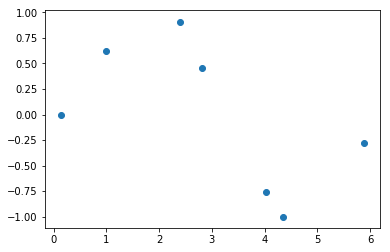

The R2 score of this model on the train set is: 0.9338410117355118


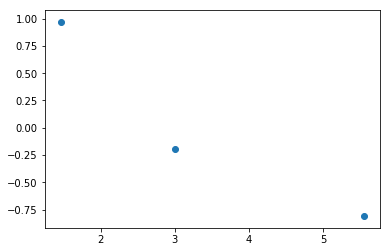

The R2 score of this model on the validation set is: 0.9049627437902916


In [130]:
x_train, y_train = sine_train_data(noise='fixed')

# we randomly pick 3 datapoints to get a nice validation set
train_i = [0, 1, 3, 4, 6, 7, 9]
val_i = [2, 5, 8]

# create the train and validation sets
x_train_i = x_train[train_i, :] #: means 'all columns'
y_train_i = y_train[train_i]
x_val_i = x_train[val_i, :]
y_val_i = y_train[val_i]
print(x_train_i)
print(y_train_i)

##### Implement this part of the code #####
#raise NotImplementedError()
pol_exp = sklearn.preprocessing.PolynomialFeatures(degree= 3 )

model = sklearn.linear_model.LinearRegression()
model.fit(pol_exp.fit_transform(x_train_i), y_train_i)

##### Implement this part of the code #####
#raise NotImplementedError()
plt.scatter(x_train_i, y_train_i)
plt.show()
print('The R2 score of this model on the train set is:', model.score(pol_exp.fit_transform(x_train_i), y_train_i ))
plt.scatter(x_val_i, y_val_i)
plt.show()
print('The R2 score of this model on the validation set is:', model.score(pol_exp.fit_transform(x_val_i), y_val_i ))

Now test this result on the test set with the following code.

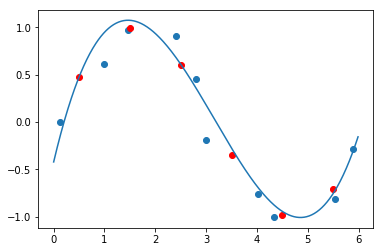

The score of the model on the test set is: 0.9950587713898605


In [131]:
assert pol_exp.degree < 5

x_test, y_test = sine_test_data()

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='r')
x = np.arange(0,6, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

print('The score of the model on the test set is:', model.score(pol_exp.fit_transform(x_test), y_test))

As you can see this approach works to select het optimal degree. Usually the test score is lower than the validation score, but in this case it is not because the test data doesn't contain noise.

### 5.2. Cross-Validation

To improve this procedure you can repeat the process above for different train and validation sets so that the optimal parameter is less dependent on the way the data was selected.

One basic strategy for this is **leave-one-out** cross validation, where each data point is left out of the train set once, and the model is then validated on this point. Now let's implement this. First make a 2-dimensional array `results` to store all your results using the [`np.ones()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) function: 1 dimension (row) for each validation set and 1 dimension (column) for each degree of the `PolynomialFeatures()` function. Then you loop over all the validation sets followed by a loop over all the degrees of the `PolynomialFeatures()` function you want to try out. Then set the result for that experiment in the right element of the `results` array.

We will use the [mean squared error (MSE)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) instead of R2 because that is more stable. Since the MSE measures the error, smaller values are better.

Now that you have your results average them over all validation sets (using the [`np.mean()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) function over the correct axis) so that you know the average error for each degree over all validation sets. Now find the the degree with the smallest error using the [`np.argmin()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html) function.

In [133]:
x_train, y_train = sine_train_data(noise='fixed')

##### Implement this part of the code #####
#raise NotImplementedError()
os = np.ones((1,1))
print(os)

# multiplied with a very large number, np.inf, since we are looking for the smallest error
results = np.inf * np.ones((10,10))
print(results)
print(pol_exp.degree)



[[1.]]
[[inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]]
3


In [137]:
for i in range(10):
    train_i = np.where(np.arange(10) != i)[0]
    x_train_i = x_train[train_i, :]
    y_train_i = y_train[train_i]
    x_val_i = x_train[i:i+1, :]
    y_val_i = y_train[i:i+1]
    
    for degree in range(10):
        pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=degree)
        model = sklearn.linear_model.LinearRegression()
        model.fit(pol_exp.fit_transform(x_train_i), y_train_i)        
        results[i,degree] = sklearn.metrics.mean_squared_error(model.predict(pol_exp.fit_transform(x_val_i)), y_val_i)

print(results)

average_results = np.mean(results, axis=0)
print(average_results)
# find the optimal degree
degree = np.argmin(average_results)

print('The optimal degree for the polynomials is:', degree)

[[8.34025708e-05 1.35293838e+00 3.05217768e+00 1.22081232e+00
  3.64104158e+00 6.15664482e+00 5.29869494e+01 6.78331213e+02
  1.48282228e+05 1.04912589e+04]
 [4.84708447e-01 1.55595689e-02 3.17297462e-02 1.61156772e-01
  9.74910845e-02 5.16026685e-02 4.92139389e-01 2.89066377e+00
  3.33210673e+02 7.54449172e+01]
 [1.18605931e+00 4.83086866e-01 4.55276639e-01 2.03913868e-03
  8.98752716e-03 3.40698901e-03 1.59223962e-01 5.28426853e-01
  3.87207191e+01 1.37217584e+01]
 [1.03930476e+00 7.13220604e-01 6.66829146e-01 1.75063437e-01
  1.29576866e-01 1.03400030e-01 5.10559640e-02 2.51303058e-02
  9.32487140e-01 6.43407037e-01]
 [2.67509491e-01 1.98968727e-01 1.40797502e-01 5.96777354e-02
  2.24074581e-02 1.62169027e-02 5.49909856e-02 4.78527004e-02
  9.92006919e-02 8.62068128e-02]
 [4.10506825e-02 4.77076353e-02 1.45675185e-01 1.24737391e-01
  2.97882129e-01 2.82262557e-01 2.25523100e-01 2.12870791e-01
  1.64873891e-01 1.58935791e-01]
 [6.91823301e-01 3.30931090e-01 5.09055236e-01 6.59645864e

Now let's have a look at the result.

The score of this method is on the train set is: 0.9331060929929709


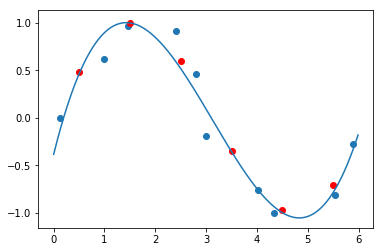

The score of the model on the test set is: 0.9955340459812839


In [138]:
assert degree == 3

pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=degree)

model = sklearn.linear_model.LinearRegression()
model.fit(pol_exp.fit_transform(x_train), y_train)
print('The score of this method is on the train set is:', model.score(pol_exp.fit_transform(x_train), y_train))

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='r')
x = np.arange(0,6, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

print('The score of the model on the test set is:', model.score(pol_exp.fit_transform(x_test), y_test))

As you can see this automatic way of selecting the optimal degree has resulted in a good fit for the sine function.

### 5.3 Regularisation

When you have too many parameters in your model, there is a risk of overfitting, i.e. your model learns the noise. To avoid this, techniques have been developed to make an estimation of this noise. 

One of these techniques is Ridge Regression. This linear regression technique has an additional parameter called the regularisation parameter. This parameter basically sets the standard deviation of the noise you want to remove. The effect in practice is that it makes sure the weights of linear regression remain small and thus less over-fitting.

Since this is an additional parameter that needs to be set, it needs to be set using cross-validation as well. Luckily sklearn developed a method that does this for us in a computational efficient way called [`sklearn.linear_model.RidgeCV()`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

The R2 score of this method is on the train set is: 0.9213779225542297


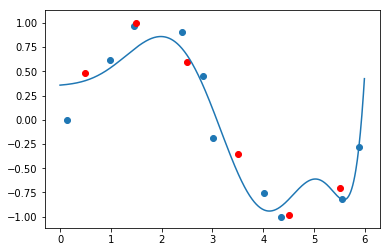

The R2 score of the model on the test set is: 0.9532320500034708


In [155]:
x_train, y_train = sine_train_data(noise='fixed')

pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=9)
##### Implement this part of the code #####
#raise NotImplementedError()
model = sklearn.linear_model.RidgeCV()
model.fit(pol_exp.fit_transform(x_train), y_train)
print('The R2 score of this method is on the train set is:', model.score(pol_exp.fit_transform(x_train), y_train))

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='r')
x = np.arange(0,6, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

print('The R2 score of the model on the test set is:', model.score(pol_exp.fit_transform(x_test), y_test))

As you can see above, the result of Ridge Regression is not as good as reducing the number of features in this example. However it works a lot better than without regularisation (try that). In the example above you will notice that it makes the result a lot smoother and removes the unwanted spikes. It will actually make sure that if you have too many features you still get a reasonable result. So this means that it should be in your standard toolkit.

The removal of the extra features can be automated using feature selection. A very short introduction to sklearn on the topic can be found [here](http://scikit-learn.org/stable/modules/feature_selection.html).

Another method that is often used is [`sklearn.linear_model.LassoCV()`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV) which actually combines removal of features and estimation of the noise. It is however very dependent on the dataset which of the two methods performs best.

Cross-validation should be applied to any parameter you set in your function and that without looking at the test set.

Over-fitting is one of the biggest issues in machine learning and most of the research that is currently being done in machine learning is a search for techniques to avoid over-fitting. As a starting point we list a few of the techniques that you can use to avoid over-fitting:
* Use more data
* Artificially generate more data based on the original data
* Use a smaller model (with less parameters)
* Use less features (and thus less parameters)
* Use a regularisation parameter
* Artificially add noise to your model
* Only use linear models or make sure that the non-linearity in your model is closer to a linear function
* Combine multiple models that each over-fit in their own way into what is called an ensemble

### 5.4 Extrapolation

Now let's extend the range of the optimal plot you achieved from -4 to 10. What do you see? Does it look like a sine function?

The R2 score of this method is on the train set is: 0.9115787383070341


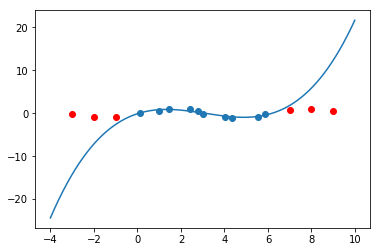

The R2 score of the model on the test set outside the area used for training is: -129.3404631328435


In [156]:
x_train, y_train = sine_train_data(noise='fixed')

pol_exp = sklearn.preprocessing.PolynomialFeatures(degree=3)

model = sklearn.linear_model.RidgeCV()
model.fit(pol_exp.fit_transform(x_train), y_train)
print('The R2 score of this method is on the train set is:', model.score(pol_exp.fit_transform(x_train), y_train))

# Now test outside the area of the training
x_test_extended = np.array([-3,-2,-1,7,8,9]).reshape((-1, 1))
y_test_extended = np.sin(x_test_extended)

plt.scatter(x_train, y_train)
plt.scatter(x_test_extended, y_test_extended, color='r')
x = np.arange(-4,10, 0.01).reshape((-1, 1))
plt.plot(x, model.predict(pol_exp.fit_transform(x)))
plt.show()

print('The R2 score of the model on the test set outside the area used for training is:',
      model.score(pol_exp.fit_transform(x_test_extended), y_test_extended))

As you can see, the extrapolation results for non-linear regression are even worse than for those of linear regression. This is because models only work well in the input space they have been trained in. 

A possible way to be able to extrapolate and to use a non-linear method is to use forecasting techniques. This part is optional for those interested and going through the tutorial quite fast. Otherwise continue to the final part on classification in exercise 7.

## 6. Classification

In classification the purpose is to separate 2 classes. As an example we will use the double spiral. It is a very common toy example in machine learning and allows you to visually show what is going on.

As shown in the graph below the purpose is to separate the blue from the red dots.

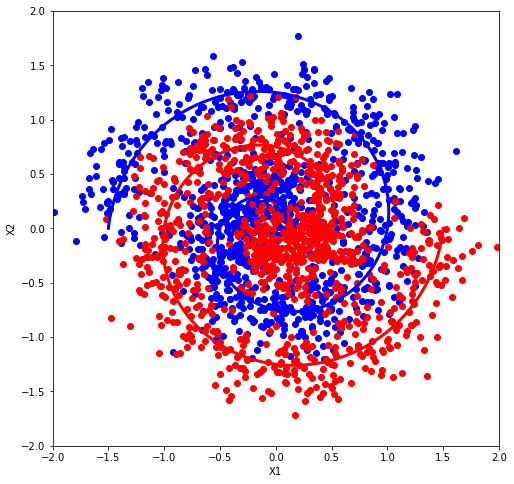

In [157]:
# Some code to generate spirals. You can ignore this for now.

# To comply with standards in machine learning we use x1 and x2 as opposed to x and y for this graph 
# because y is reserved for the output in Machine Learning (= 0 or 1 in this case)

r = np.arange(0.1, 1.5, 0.0001)
theta = 2 * np.pi * r
x1_0 = r * np.cos(theta)
x2_0 = r * np.sin(theta)
x1_1 = - r * np.cos(theta)
x2_1 = - r * np.sin(theta)

perm_indices = np.random.permutation(range(len(x1_0)))
x1_0_rand = x1_0[perm_indices[ : 1000]] + np.random.randn(1000) / 5
x2_0_rand = x2_0[perm_indices[ : 1000]] + np.random.randn(1000) / 5
x1_1_rand = x1_1[perm_indices[1000 : 2000]] + np.random.randn(1000) / 5
x2_1_rand = x2_1[perm_indices[1000 : 2000]] + np.random.randn(1000) / 5

plt.figure(figsize=(8,8))
plt.scatter(x1_0_rand, x2_0_rand, color = 'b')
plt.scatter(x1_1_rand, x2_1_rand, color = 'r')

plt.plot(x1_0, x2_0, color = 'b', lw=3)
plt.plot(x1_1, x2_1, color='r', lw=3)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In a colored image this is easy to do, but when you remove the color it becomes much harder. Can you do the classification in the image below?

In black the samples from the train set are shown and in yellow the samples from the validation set.

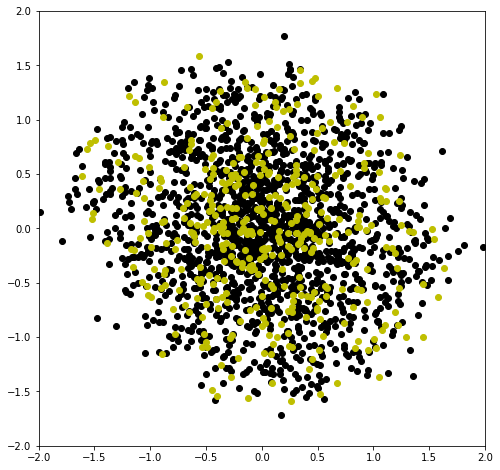

In [158]:
# Create a train and validation set

x_train_0 = np.concatenate((x1_0_rand[ : 800].reshape((-1,1)), x2_0_rand[ : 800].reshape((-1,1))), axis=1)
y_train_0 = np.zeros((len(x_train_0),))
x_train_1 = np.concatenate((x1_1_rand[ : 800].reshape((-1,1)), x2_1_rand[ : 800].reshape((-1,1))), axis=1)
y_train_1 = np.ones((len(x_train_1),))

x_val_0 = np.concatenate((x1_0_rand[800 : ].reshape((-1,1)), x2_0_rand[800 : ].reshape((-1,1))), axis=1)
y_val_0 = np.zeros((len(x_val_0),))
x_val_1 = np.concatenate((x1_1_rand[800 : ].reshape((-1,1)), x2_1_rand[800 : ].reshape((-1,1))), axis=1)
y_val_1 = np.ones((len(x_val_1),))

x_train = np.concatenate((x_train_0, x_train_1), axis=0)
y_train = np.concatenate((y_train_0, y_train_1), axis=0)

x_val = np.concatenate((x_val_0, x_val_1), axis=0)
y_val = np.concatenate((y_val_0, y_val_1), axis=0)

# Plot the train and test data

plt.figure(figsize=(8, 8))
plt.scatter(x_train[:, 0], x_train[:, 1], color='k')
plt.scatter(x_val[:, 0], x_val[:, 1], color='y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

As you can see classifying is very hard to do when you don't get the answer even if you saw the solution earlier. But you will see that machine learning algorithms can solve this quite well if they can learn from examples.

### 6.1 Linear classifier

Let's try to do this with a linear classifier.

A linear classifier is basically a form of linear regression where the output is set to 1 for all the data points of class 1 and to 0 for all the data points of class 0.

In [145]:
##### Implement this part of the code #####
#raise NotImplementedError()
model = sklearn.linear_model.LinearRegression()
model.fit(x_train, y_train )

print('The train accuracy is:', sklearn.metrics.accuracy_score(model.predict(x_train) > 0.5, y_train))
val_score = sklearn.metrics.accuracy_score(model.predict(x_val) > 0.5, y_val)
print('The validation accuracy is:', val_score)

assert val_score > 0.5

The train accuracy is: 0.60875
The validation accuracy is: 0.635


Now let's plot the result.

In [146]:
# A quick and dirty helper function to plot the decision boundaries
def plot_decision_boundary(model, pol_exp=None):
    n=250
    lin_space = np.linspace(-2, 2, num=n).reshape((-1, 1))
    x1 = np.dot(lin_space, np.ones((1, n))).reshape((-1, 1))
    x2 = np.dot(np.ones((n, 1)), lin_space.T).reshape((-1, 1))
    
    x = np.concatenate((x1, x2), axis=1)
    if pol_exp is None:
        y = model.predict(x)
    else:
        y = model.predict(pol_exp.fit_transform(x))    
    i_0 = np.where(y < 0.5)
    i_1 = np.where(y > 0.5)
    plt.figure(figsize=(8,8))
    plt.scatter(x[i_0, 0], x[i_0, 1], color='b', s=1)
    plt.scatter(x[i_1, 0], x[i_1, 1], color='r', s=1)
    plt.plot(x1_0, x2_0, color = 'b', lw=3)
    plt.plot(x1_1, x2_1, color='r', lw=3)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)

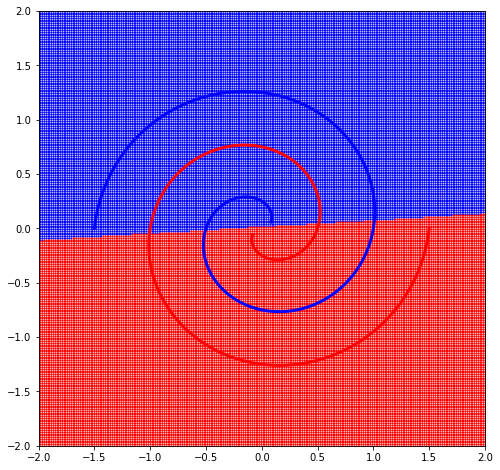

In [147]:
plot_decision_boundary(model)

As you can see a linear classifier returns a linear decision boundary.

### 6.2 Non-linear classification

Now let's do this better with a non-linear classifier using polynomials. Play with the degree of the polynomial expansion and look for the effect of the `RidgeCV()` and `LassoCV()` models. What gives you the best results?

The train accuracy is: 0.67125
The validation accuracy is: 0.7125


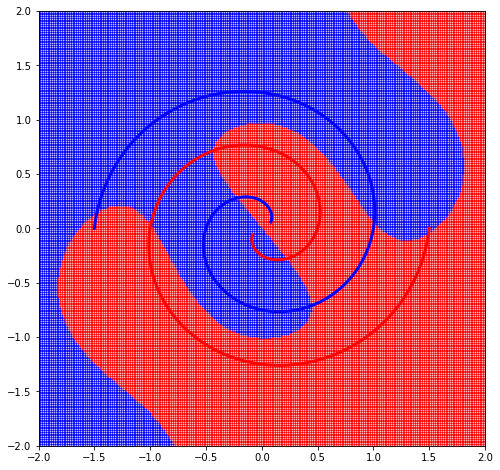

In [175]:
##### Implement this part of the code #####
#raise NotImplementedError()
model = sklearn.linear_model.LassoCV()
pol_exp = sklearn.preprocessing.PolynomialFeatures(degree= 5 )
model.fit(pol_exp.fit_transform(x_train), y_train)

print('The train accuracy is:', sklearn.metrics.accuracy_score(model.predict(pol_exp.fit_transform(x_train)) > 0.5, y_train))
val_score = sklearn.metrics.accuracy_score(model.predict(pol_exp.fit_transform(x_val)) > 0.5, y_val)
print('The validation accuracy is:', val_score)

plot_decision_boundary(model, pol_exp=pol_exp)

assert val_score > 0.7

The train accuracy is: 0.77125
The validation accuracy is: 0.7675


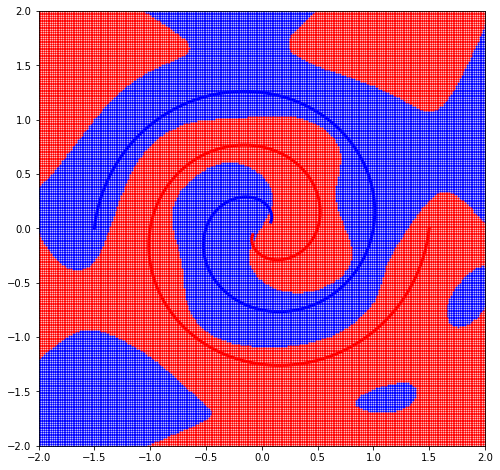

In [180]:
##### Implement this part of the code #####
#raise NotImplementedError()
model = sklearn.linear_model.RidgeCV()
pol_exp = sklearn.preprocessing.PolynomialFeatures(degree= 10 )
model.fit(pol_exp.fit_transform(x_train), y_train)

print('The train accuracy is:', sklearn.metrics.accuracy_score(model.predict(pol_exp.fit_transform(x_train)) > 0.5, y_train))
val_score = sklearn.metrics.accuracy_score(model.predict(pol_exp.fit_transform(x_val)) > 0.5, y_val)
print('The validation accuracy is:', val_score)

plot_decision_boundary(model, pol_exp=pol_exp)

assert val_score > 0.7

If everything went well you should get a validation/test accuracy very close to 0.8.

### 6.3 Random Forests

An often used technique in machine learning are random forests. Basically they are [decision trees](https://en.wikipedia.org/wiki/Decision_tree_learning), or in programmers terms, if-then-else structures, like the one shown below.

<img src="images/tree.png" width=70%>

Decision trees are know to over-fit a lot because they just learn the train set by heart and store it. Random forests on the other hand combine multiple different (randomly initialized) decision trees that all over-fit in their own way. But by combining their output using a voting mechanism, they tend to cancel out eachothers mistakes. This approach is called an [ensemble](https://en.wikipedia.org/wiki/Ensemble_learning) and can be used for any combination of machine learning techniques. A schematical representation of how such a random forest works is shown below.

<img src="images/random_forest.jpg">

Now let's try to use a random forest to solve the double spiral problem. (see [`sklearn.ensemble.RandomForestClassifier()`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

The train accuracy is: 0.981875
The validation accuracy is: 0.75


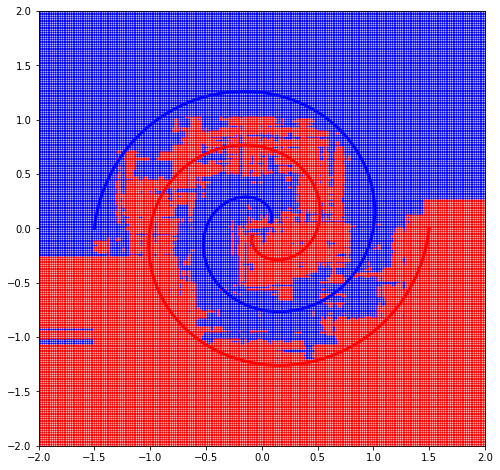

In [196]:
import sklearn.ensemble

##### Implement this part of the code #####
#raise NotImplementedError()
model = sklearn.ensemble.RandomForestClassifier()
model.fit(x_train, y_train)

print('The train accuracy is:', sklearn.metrics.accuracy_score(model.predict(x_train) > 0.5, y_train))
val_score = sklearn.metrics.accuracy_score(model.predict(x_val) > 0.5, y_val)
print('The validation accuracy is:', val_score)

plot_decision_boundary(model)

assert val_score > 0.7

As you can see they are quite powerful right out of the box without any parameter tuning. But we can get the results even beter with some fine tuning.

Try changing the `min_samples_leaf` parameter for values between 0 and 1.

The train accuracy is: 0.825
The validation accuracy is: 0.7875


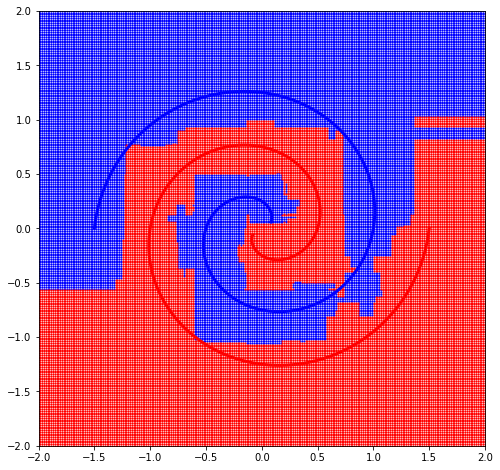

In [201]:
##### Implement this part of the code #####
#raise NotImplementedError()
model = sklearn.ensemble.RandomForestClassifier(min_samples_leaf=0.01)
model.fit(x_train, y_train)

print('The train accuracy is:', sklearn.metrics.accuracy_score(model.predict(x_train) > 0.5, y_train))
val_score = sklearn.metrics.accuracy_score(model.predict(x_val) > 0.5, y_val)
print('The validation accuracy is:', val_score)

plot_decision_boundary(model)

assert val_score > 0.5

The `min_samples_leaf` parameter sets the number of datapoints that can create a new branch/leaf in the tree. So in practice it limits the depth of the decision tree. The bigger this parameter is, the less deep the tree will be and less likely each tree will overfit.

For this parameter you can set integer numbers to set the specific number of samples, or you can use values between 0 and 1 to express a percentage of the size of the dataset. Since you might exeperiment with a smaller dataset to roughly tune your paremeters, it is best to use values between 0 and 1 so that the value you chose is not as dependant on the size of the dataset you are working with.

Now that you have found the optimal `min_samples_leaf` run the code again with the same parameter. Do you get the same result? Why not?

Another parameter to play with is the `n_estimators` parameter. Play with only this parameter to see what happens.

The train accuracy is: 0.9825
The validation accuracy is: 0.7475


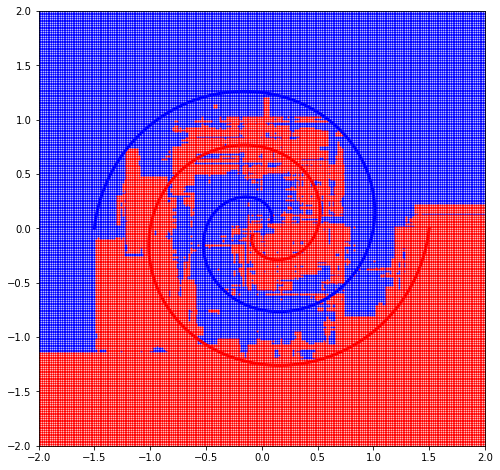

In [208]:
##### Implement this part of the code #####
#raise NotImplementedError()
model = sklearn.ensemble.RandomForestClassifier(n_estimators=10)
model.fit(x_train, y_train)

print('The train accuracy is:', sklearn.metrics.accuracy_score(model.predict(x_train) > 0.5, y_train))
val_score = sklearn.metrics.accuracy_score(model.predict(x_val) > 0.5, y_val)
print('The validation accuracy is:', val_score)

plot_decision_boundary(model)

assert val_score > 0.7

As you can see increasing the number of estimators improves the model and reduces over-fitting. This parameter actually sets the number of trees in the random forest. The more trees there are in the forest the better the result is. But obviously it requires more computing power so that is the limiting factor here.

This is the basic idea behind ensembles: if you combine more tools you get a good result on average.

Now try combining the `n_estimators` and `min_samples_leaf` parameter below.

The train accuracy is: 0.83
The validation accuracy is: 0.7875


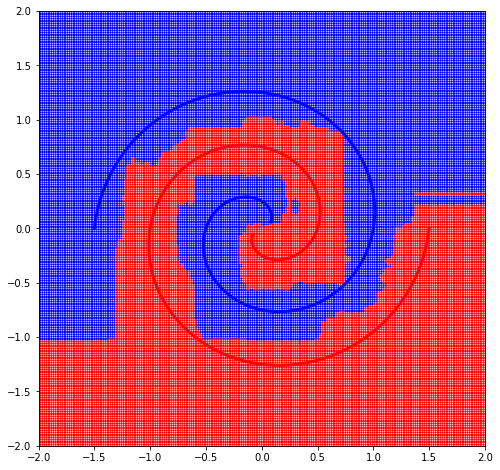

In [209]:
##### Implement this part of the code #####
#raise NotImplementedError()
model = sklearn.ensemble.RandomForestClassifier(n_estimators= 1000 , min_samples_leaf= 0.01 )
model.fit(x_train, y_train)

print('The train accuracy is:', sklearn.metrics.accuracy_score(model.predict(x_train) > 0.5, y_train))
val_score = sklearn.metrics.accuracy_score(model.predict(x_val) > 0.5, y_val)
print('The validation accuracy is:', val_score)

plot_decision_boundary(model)

assert val_score > 0.7

As you have noticed by now it seems that random forests are less powerful than linear regression with polynomial feature extraction. This is because these polynomials are ideally suited for this task. This also means that you could get a better result if you would also apply polynomial expansion for random forests. Try that below.

The train accuracy is: 0.835
The validation accuracy is: 0.7875


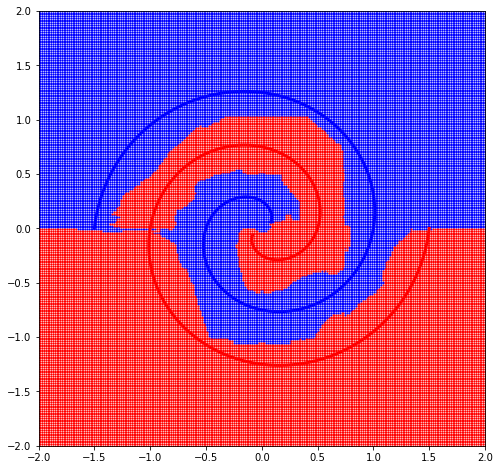

In [210]:
##### Implement this part of the code #####
#raise NotImplementedError()
model = sklearn.ensemble.RandomForestClassifier(n_estimators= 100 , min_samples_leaf=0.01 )
pol_exp = sklearn.preprocessing.PolynomialFeatures(degree= 11)
model.fit(pol_exp.fit_transform(x_train), y_train )

print('The train accuracy is:', sklearn.metrics.accuracy_score(model.predict(pol_exp.fit_transform(x_train)) > 0.5, y_train))
val_score = sklearn.metrics.accuracy_score(model.predict(pol_exp.fit_transform(x_val)) > 0.5, y_val)
print('The validation accuracy is:', val_score)

plot_decision_boundary(model, pol_exp=pol_exp)

assert val_score > 0.7

As you have noticed it is still not possible to get the same result as linear regression. This illustrates that linear techniques are very powerful and often underrated. But in some situations they are not powerful enough and you need something stronger like a random forest or even neural networks.

There is one neat trick that can be used for random forests. If you set the `n_jobs` it will use more than 1 core to compute. Set it to -1 to use all the cores (including hyperthreading cores). But don't do that during this tutorial because that would block the machine you are all working on.

To avoid over-fitting you have set the `max_depth` parameter for random forests which sets the maximum depth of the tree. Instead you can also set the `min_samples_split` parameter which determines while building the tree how many data points you need at least before you create another split (this is an additional if-else structure). Or the `min_samples_leaf` that sets the minimum amount of data points you have in each leaf. All 3 parameters are dependent on the number of data points in your dataset especially the last 2 so don't forget to adapt them if you have been playing around with a small subset of the data. (A good trick to solve this might be to use a range similar to `[0.0001, 0.001, 0.01, 0.1] * len(x_train)`. Feel free to extend the range in any direction. It is generally good practice to construct them using a log scale like in the example, or better like this: `10.0**np.arange(-5, 0, 0.5) * len(x_train)`.) In my experience `min_samples_split` or `min_samples_leaf` give slightly better results and it ususally doesn't make sense to combine more than 1 of these parameters.

In the previous exercises we have done a lot of the optimizations on the test set. This should of course be avoided. What you should do instead is to optimize and select your model using a validation set and of course you should automate this proces as shown in one of the earlier exercises. One thing to take into account here is that you should use multiple initialisation of a random forest because the decision trees is randomly generated.

## 7. Forecasting (Optional)

For the forecasting we are going to use page views data, very similar to the data used in the anomaly detection section. It is also page view data and contains 1 sample per hour. 

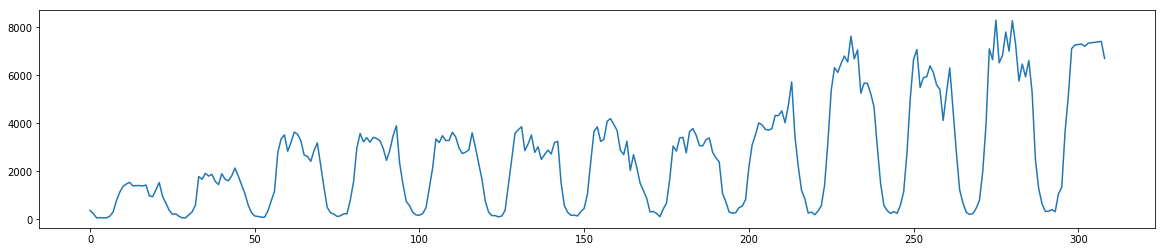

In [211]:
train_set = pickle.load(open('data/train_set_forecasting.pickle', 'rb'), encoding='latin1')

plt.figure(figsize=(20,4))
plt.plot(train_set)
plt.show()

In the graph above you can clearly see that there is a rising trend in the data.

### 7.1 One-step ahead prediction

This forecasting section will describe the one-step ahead prediction. This means in this case that we will only predict the next data point which is in this case the number of pageviews in the next hour.

Now let's first build a model that tries to predict the next data point from the previous one.

In [212]:
import sklearn
import sklearn.linear_model
import sklearn.gaussian_process

model = sklearn.linear_model.LinearRegression()

# the input x_train contains all the data except the last data point
x_train = train_set[ : -1].reshape((-1, 1)) # the reshape is necessary since sklearn requires a 2 dimensional array

# the output y_train contains all the data except the first data point
y_train = train_set[1 : ]

# this code fits the model on the train data
model.fit(x_train, y_train)

# this score gives you how well it fits on the train set
# higher is better and 1.0 is perfect
print('The R2 train score of the linear model is', model.score(x_train, y_train))

The R2 train score of the linear model is 0.8868806984184587


As you can see from the score above, the model is not perfect but it seems to get a relatively high score. Now let's make a prediction into the future and plot this.

To predict the datapoint after that we will use the predicted data to make a new prediction. The code below shows how this works for this data set using the linear model you used earlier. Don't forget to fill out the missing code.

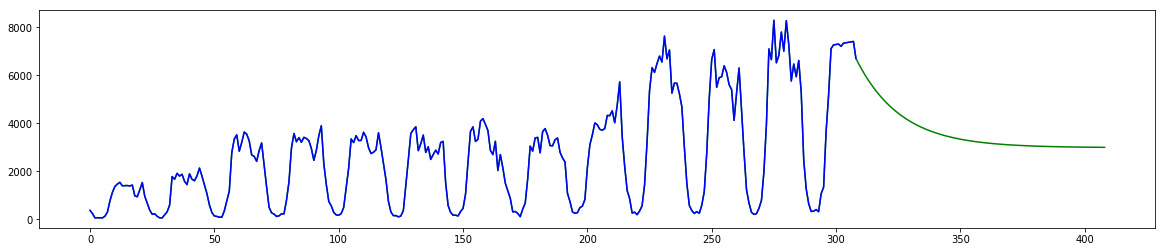

In [213]:
nof_predictions = 100

import copy
# use the last data point as the first input for the predictions
x_test = copy.deepcopy(train_set[-1]) # make a copy to avoid overwriting the training data

prediction = []
for i in range(nof_predictions):
    # predict the next data point
    y_test = model.predict([[x_test]])[0] # sklearn requires a 2 dimensional array and returns a one-dimensional one
    
    ##### Implement this part of the code #####
    #raise NotImplementedError()
    prediction.append(y_test)
    x_test = y_test

prediction = np.array(prediction)

plt.figure(figsize=(20,4))
plt.plot(np.concatenate((train_set, prediction)), 'g')
plt.plot(train_set, 'b')
plt.show()

As you can see from the image above the model doesn't quite seem to fit the data well. Let's see how we can improve this.

### 7.2 Multiple features

If your model is not smart enough there is a simple trick in machine learning to make your model more intelligent (but also more complex). This is by adding more features.

To make our model better we will use more than 1 sample from the past. To make your life easier there is a simple function below that will create a data set for you. The ```width``` parameter sets the number of hours in the past that will be used.

In [250]:
def convert_time_series_to_train_data(ts, width):
    x_train, y_train = [], []
    for i in range(len(ts) - width - 1):
        x_train.append(ts[i : i + width])
        y_train.append(ts[i + width])
    return np.array(x_train), np.array(y_train)

In [251]:
width = 5
x_train, y_train = convert_time_series_to_train_data(train_set, width)

print(x_train.shape, y_train.shape)

(303, 5) (303,)


As you can see from the print above both `x_train` and `y_train` contains 303 datapoints. For `x_train` you see that there are now 5 features which contain the pageviews from the 5 past hours.

So let's have a look what the increase from 1 to 5 features results to.

In [252]:
width = 100
x_train, y_train = convert_time_series_to_train_data(train_set, width)
model = sklearn.linear_model.LinearRegression()
model.fit(x_train, y_train)
print('The R2 score of the linear model with width =', width, 'is', model.score(x_train, y_train))

The R2 score of the linear model with width = 100 is 0.9736365138084162


Now change the ```width``` parameter to see if you can get a better score.

### 7.3 Over-fitting


Now execute the code below to see the prediction of this model.

In [253]:
import copy

# this is a helper function to make the predictions
def predict(model, train_set, width, nof_points):
    prediction = []
    # create the input data set for the first predicted output
    # copy the data to make sure the orriginal is not overwritten
    x_test = copy.deepcopy(train_set[-width : ]) 
    for i in range(nof_points):
        # predict only the next data point
        prediction.append(model.predict(x_test.reshape((1, -1))))
        # use the newly predicted data point as input for the next prediction
        x_test[0 : -1] = x_test[1 : ]
        x_test[-1] = prediction[-1]
    return np.array(prediction)

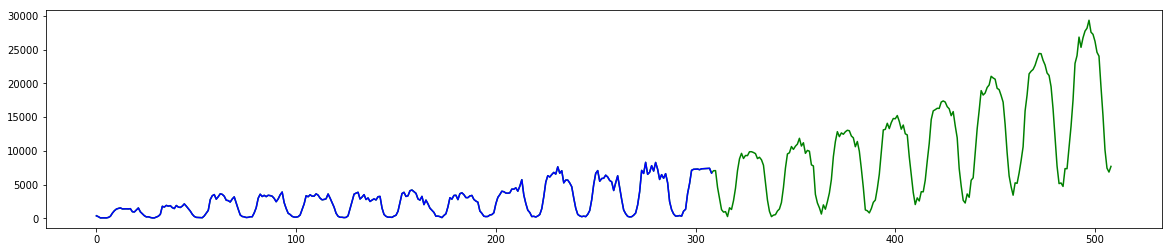

In [254]:
nof_predictions = 200
prediction = predict(model, train_set, width, nof_predictions)

plt.figure(figsize=(20,4))
plt.plot(np.concatenate((train_set, prediction[:,0])), 'g')
plt.plot(train_set, 'b')
plt.show()

As you can see in the image above the prediction is not what you would expect from a perfect model. What happened is that the model learned the training data by heart without 'understanding' what the data is really about. This fenomenon is called over-fitting and will always occur if you make your model more complex.

Now play with the width variable below to see if you can find a more sensible width.

The R2 score of the linear model with width = 25 is 0.9568374290501266


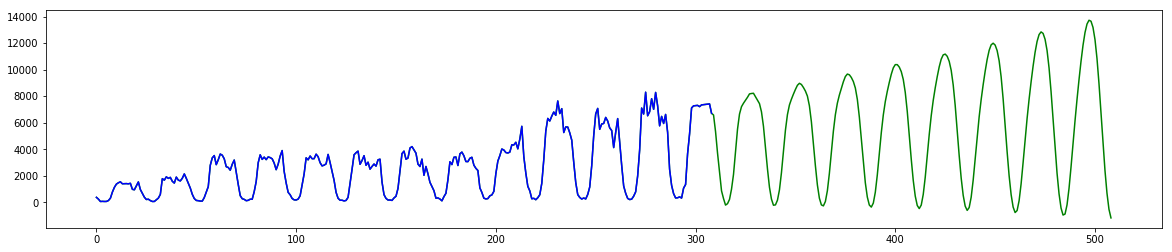

In [255]:
##### Implement this part of the code #####
#raise NotImplementedError()
width = 25

x_train, y_train = convert_time_series_to_train_data(train_set, width)
model = sklearn.linear_model.LinearRegression()
model.fit(x_train, y_train)
print('The R2 score of the linear model with width =', width, 'is', model.score(x_train, y_train))

prediction = predict(model, train_set, width, 200)

plt.figure(figsize=(20,4))
plt.plot(np.concatenate((train_set, prediction[:,0])), 'g')
plt.plot(train_set, 'b')
plt.show()

assert width > 1

As you will have noticed by now is that it is better to have a non-perfect score which will give you a much better outcome. Now try the same thing for the following models:
* ```sklearn.linear_model.RidgeCV()```
* ```sklearn.linear_model.LassoCV()```
* ```sklearn.ensemble.RandomForestRegressor()```

The first 2 models also estimate the noise that is present in the data to avoid overfitting. `RidgeCV()` will keep the weights that are found small, but it won't put them to zero. `LassoCV()` on the other hand will put several weights to 0. Execute ```model.coef_``` to see the actual coefficients that have been found.

`RandomForestRegressor()` is the regression variant of the `RandomForestClassifier()` and is therefore thus a non-linear method. This makes this method a lot more complex and therefore it will be able to represent more complex shapes than the linear method. This also means that it is much more capable to learn the data by heart (and thus to over-fit). In many cases however this additional complexity allows to better understand the data given the correct parameter settings (try a couple of times `width = 25` (since it is random) and see what the results are; set the `n_estimators` parameter to a higher number to get a more stable results). 

### 7.4 Automation

What we have done up to now is manually selecting the best outcome based on the test result. This can be considered cheating because you have just created a self-fulfilling prophecy. Additionally it is not only cheating it is also hard to find the exact `width` that gives the best result by just visually inspecting it. So we need a more objective approach to solve this.

To automate this process you can use a validation set. In this case we will use the last 48 hours of the training set to validate the score and select the best parameter value. This means that we will have to use a subset of the training set to fit the model.

In [256]:
model_generators = [sklearn.linear_model.LinearRegression, sklearn.linear_model.RidgeCV,
                    sklearn.linear_model.LassoCV, sklearn.ensemble.RandomForestRegressor]
best_score = 0

##### Implement this part of the code #####
#raise NotImplementedError()
for model_gen in model_generators :
    for width in range(10, 50): 
        x_train, y_train = convert_time_series_to_train_data(train_set, width)
        # train the model on the first 48 hours
        x_train_i, y_train_i = x_train[ : -48, :], y_train[ : -48]
        # use the last 48 hours for validation
        x_val_i, y_val_i = x_train[-48 : ], y_train[-48 : ]
        
        ##### Implement this part of the code #####
        #raise NotImplementedError()
        model = model_gen()
        
        # there is a try except clause here because some models do not converge for some data
        try:
            ##### Implement this part of the code #####
            #raise NotImplementedError()
            model.fit( x_train_i, y_train_i )
            this_score = model.score(x_val_i, y_val_i)
            
            if this_score > best_score:
                best_score = this_score
                best_model_gen = model_gen
                best_width = width
        except:
            pass

print(best_model_gen().__class__, 'was selected as the best model with a width of', best_width,
      'and a validation R2 score of', best_score)

<class 'sklearn.linear_model.coordinate_descent.LassoCV'> was selected as the best model with a width of 26 and a validation R2 score of 0.9465631946950833


If everything is correct the LassoCV methods was selected.

Now we are going to train this best model on all the data. In this way we use all the available data to build a model.

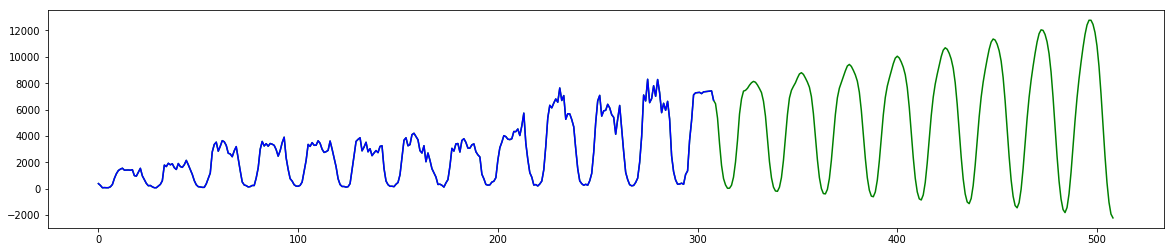

In [260]:
##### Implement this part of the code #####
#raise NotImplementedError()
width = best_width
model = best_model_gen()

x_train, y_train = convert_time_series_to_train_data(train_set, width)

##### Implement this part of the code #####
#raise NotImplementedError()
model.fit( x_train , y_train )

nof_predictions = 200
prediction = predict(model, train_set, width, nof_predictions)

plt.figure(figsize=(20,4))
plt.plot(np.concatenate((train_set, prediction[:,0])), 'g')
plt.plot(train_set, 'b')
plt.show()

Altough the optimal result found here might not be the best visually, it is a far better result than the one you selected manually just because there was no cheating involved ;-).

Some additional info:
* This noise level of `RidgeCV()` and `LassoCV()` is estimated by automatically performing train and validation within the method itself. This will make them much more robust against over-fitting. The actual method used is [Cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) which is a better approach of what we do here because it repeats the training and validation multiple times for different training and validation sets. The parameter that is set for these methods is often called the regularization parameter in literature and is well suited to avoid over-fitting.

# 8. Main take home messages

Because we can't cover everything, we listed all the basics of what you should take home before working on your own machine learning project below. 

### 8.1 The basic rules of machine learning

Any good club has its own set of rules. The rules for machine learning club are the following:

* First rule of ML is: Over-fitting is a real problem and try anything to avoid it
* Second rule of ML is: You are probably over-fitting. Are you sure you are not fitting on your test data?
* Third rule of ML is: You think over-fitting will not happen to you, but it is happening right now!
* Fourth rule of ML is: Talk about it with your peers because over-fitting is a real issue.

### 8.2 My winning strategy

Although I'd like to claim it as mine, it is a general (non-written) consensus amongst data scientists to use the following approach. Even experts should not skip any of the steps below.

1. Create a train set and a test set
* Rescale your train set to zero-mean-unit-variance (most methods assume gaussian distributed data)
* Don't look at the test set
* Implement a cross-validation framework
* Try **linear regression with regularisation** for regression and classification (`RidgeCV` or `LassoCV`)
* Try techniques to avoid over-fitting
* Check the validation score
* If the results are not optimal and there is no overfitting going on try **adding features** else go to step 17
* Rescale your features to zero-mean-unit-variance (most methods assume gaussian distributed data) or select those features that have this property
* Try techniques to avoid over-fitting (including removing features for more info see [feature selection techniques](http://scikit-learn.org/stable/modules/feature_selection.html))
* Check the validation score
* If the results are not optimal and there is no overfitting going on try **random forrests** else go to step 17
* Try techniques to avoid over-fitting (such as feature selection, to rank the features you can use [this approach](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html))
* Check the validation score
* If the results are not optimal and there is no overfitting going on try **neural networks** or deep learning else go to step 17
* Try techniques to avoid over-fitting
* Only in the end check the score on the test set and make sure it is similar to the validation score. Otherwise you have been overfitting and you need to take a couple steps back.
* Make an ensemble of your best (but significantly different) methods
* Finally build the model using all the data available and run it in production

You can try other machine learning techniques, but usually the difference is quite small. So don't waste too much time on getting to know them because they all have their own quirks and specific ways of over-fitting. Besides maybe most important of all, Kaggle competitions are usually won with one of these techniques.

If you do want to dive into other methods or if you want more details on the methods discussed here the [sklearn website](http://scikit-learn.org/stable/) is a goot starting point.

### 8.3 How to avoid over-fitting

As you should know by now over-fitting is one of the biggest issues in machine learning. So pay attention for it. 

Below you can find some of the most common techniques to avoid over-fitting:

* Use more data
* Artificially generate more data based on the orriginal data
* Use a smaller model (with less parameters)
* Use less features (and thus less parameters)
* Use a regularisation parameter
* Artificially add noise to your model (can be random noise or can be on/of noise in neural networks so that you get dropout)
* Only use linear models (or in neural networks make sure that the non-linearity in your model is closer to a linear function)
* Combine multiple models that each over-fit in their own peculiar way into what is called an ensemble


### 8.4 Most common features

Although there is no general rule to which features you should use, there are a couple of features that come back regularly:

* Log: Take the log of the data to make it more Gaussian. This works best for data that is exponentially or log-normally distributed
* Polynomials: The square is quite common but higher orders are often used as well
* Differentials: The first and sometimes the second derivative are used (see [`numpy.diff()`](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.diff.html))
* Integrals (use [`numpy.sum()`](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.sum.html) for example to implement it)
* Mean: Often used to smooth the data
* Median: Same as the mean but this ignores outliers
* Standard deviation or variance
* Skewness and kurtosis: These are rarely used but sometimes they contain valuable information
* Fourier transform: If your data contains a frequency spectrum. Typically used when processing speech and sound. (see [`numpy.fft.fft()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.fft))
* Frequency filtering: Similar to the fourier transform (see [`scipy.signal.butter()`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.butter.html#scipy.signal.butter))
* Spatial filters: Are often used for images. Edge detectors for example
* Any other feature that seems to make sense regarding your data


## Feedback

If you have any feedback regarding this tutorial, feel free to share it with us. You can mail to <a href="mailto:pieter.buteneers@gmail.com">pieter.buteneers@gmail.com</a>.